In [13]:
# 1.目的
# 直近タイム指数について、過去何回分の平均値が適切なのか調べたい
# 2.やったこと
# XGBoostを使う。目的変数を着番とし、説明変数を直近タイム指数（平均1～5回）とする。それぞれの変数重要度を計算する

In [3]:
# インポート
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

In [5]:
# CSVファイルの読み込み
df = pd.read_csv('input1.csv', encoding='cp932')
# df = pd.read_csv('input.csv', encoding='utf-8')

In [ ]:
# 回帰の場合→XGBRegressorを使う

In [7]:
# 説明変数
x = df[["time_index_average_0",
        "time_index_average_1",
        "time_index_average_2",
        "time_index_average_3",
        "time_index_average_4"
       ]]
# 目的変数
y = df["finish_rank"]
# 学習データと検証データの分割（検証データ割合が0.477013）
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.477013, shuffle=False)
# データが正常かを確認（欠損値の有無など）
print("NaN の数:", y_train.isna().sum())
print("inf の数:", np.isinf(y_train).sum())
print("y_train のデータ型:", y_train.dtype)
# モデルの学習
model = xgb.XGBRegressor(objective='reg:squarederror', max_depth=3, random_state=42)
model.fit(x_train, y_train)
# 予測
y_pred = model.predict(x_test)
# 評価
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

NaN の数: 0
inf の数: 0
y_train のデータ型: int64
RMSE: 2.1881
R^2 Score: 0.0636


In [7]:
# 説明変数の重要度を示す

                Feature  Importance
1  time_index_average_1    0.365124
0  time_index_average_0    0.247677
3  time_index_average_3    0.132434
2  time_index_average_2    0.132139
4  time_index_average_4    0.122626


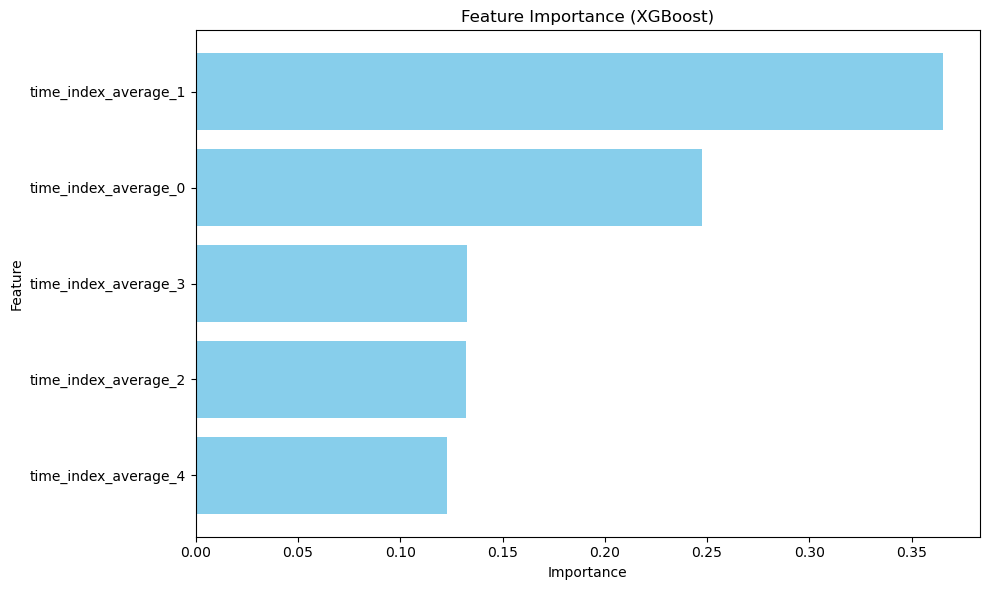

In [9]:
import matplotlib.pyplot as plt

# 特徴量名と重要度を取得
feature_names = x.columns
feature_importances = model.feature_importances_
# DataFrameで整形して、重要度順にソート
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
# 結果を表示（数値）
print(importances_df)
# 可視化（棒グラフ）
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (XGBoost)')
plt.gca().invert_yaxis()  # 重要度が高いものを上に
plt.tight_layout()
plt.show()